In [414]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/erenaldis/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [455]:
from collections import Counter
def even(C):
    cc = list(Counter(C).values())
    for i in cc:
        if i % 2 != 0:
            return False
    return True

In [466]:
n = 1000
d = 4
np.random.seed(3)
p = np.random.dirichlet(np.ones(d))
A = np.random.uniform(0,1, size=(d, d))
B = (A+A.T)/2

In [467]:
p, B

(array([ 0.25894112,  0.39846938,  0.11122949,  0.23136001]),
 array([[ 0.89294695,  0.47388015,  0.38736468,  0.11561238],
        [ 0.47388015,  0.44080984,  0.15418175,  0.50784366],
        [ 0.38736468,  0.15418175,  0.6762549 ,  0.42505763],
        [ 0.11561238,  0.50784366,  0.42505763,  0.4151012 ]]))

In [468]:
g = np.arange(len(p))
#community vector
C = np.random.choice(g, size=n, p = p)
while even(C) == False:
    C = np.random.choice(g, size=n, p = p)

#adjacency matrix
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i > j:
            c1 = C[i]
            c2 = C[j]
            A[i,j] = np.random.binomial(n=1, p=B[c1, c2])
            A[j, i] = A[i, j]
            


In [490]:
def contract(C, A, d):
    Anew = np.zeros((int(n/2), int(n/2)))
    groups = {}
    for i in np.arange(d):
        groups[i] = []
    for i in range(len(C)):
        groups[C[i]].append(i)
    
    pairs = {}
    Cnew = []
    for k in list(groups.keys()):
        if len(groups[k]) != 0:
            pairs[k] = []
            a = np.random.choice(groups[k], size=len(groups[k]), replace=False)
            i = 0
            while i < (len(a)-1):
                pairs[k].append((a[i], a[i+1]))
                i += 2
            Cnew += [k]*len(pairs[k])
    Cnew = np.array(Cnew)
    
    tups = combinevals(pairs)

    for it in range(len(tups)):
        i = tups[it][0]
        j = tups[it][1]
        for jt in range(it + 1, len(tups)):
            r = tups[jt][0]
            t = tups[jt][1]
            if (A[i, r] == 1) or (A[i, t] == 1) or (A[j, r] == 1) or (A[j, t] == 1):
                Anew[it, jt] = 1
                Anew[jt, it] = 1
            else:
                Anew[jt, it] = 0 
    return Cnew, Anew, d


/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [470]:
Cnew, Anew, dnew = contract(C, A, d)

In [471]:
def p_estimate(Cnew, dnew):
    p = np.zeros(dnew)
    for k in list(Counter(Cnew).keys()):
        p[k] = Counter(Cnew)[k] / len(Cnew)
    return p

In [472]:
p_est = p_estimate(Cnew, dnew)
p_est, p

(array([ 0.272,  0.4  ,  0.114,  0.214]),
 array([ 0.25894112,  0.39846938,  0.11122949,  0.23136001]))

In [473]:
def B_estimate(Cnew, Anew, dnew):
    
    inds = {}
    for i in np.unique(Cnew):
        inds[i] = np.where(Cnew == i)[0]
    #for i in list(inds.keys()):
    B_est = np.zeros((dnew, dnew))
    for i in list(inds.keys()):
        s = 0
        comp = [(x, y) for x in inds[i] for y in inds[i]]
        for (x,y) in comp:
            s += Anew[x, y]
        B_est[i,i] = s/(len(inds[i])*(len(inds[i])-1))

    #Bij
    for i in list(inds.keys()):
        for j in list(inds.keys()):
            if i !=j:
                s = 0
                comp = [(x, y) for x in inds[i] for y in inds[j]]
                for (x,y) in comp:
                    s += Anew[x, y]
                B_est[i,j] = s/(len(inds[i])*(len(inds[j])))  
    return B_est

In [474]:
def Bnew(B):
    Bnew = np.zeros(shape(B))
    for i in range(len(B)):
        for j in range(i, len(B)):
            Bnew[i,j] = 1 - (1-B[i,j])**4
            Bnew[j,i] = Bnew[i,j]
    return Bnew

In [475]:
print(p_estimate(Cnew, dnew), p)
print(B_estimate(Cnew, Anew, dnew), Bnew(B))

[ 0.272  0.4    0.114  0.214] [ 0.25894112  0.39846938  0.11122949  0.23136001]
[[ 0.99978214  0.92492647  0.85900413  0.39231721]
 [ 0.92492647  0.90095477  0.48701754  0.94037383]
 [ 0.85900413  0.48701754  0.98245614  0.88817839]
 [ 0.39231721  0.94037383  0.88817839  0.87956269]] [[ 0.99986866  0.9233806   0.85913337  0.38825473]
 [ 0.9233806   0.90222269  0.48819065  0.94133051]
 [ 0.85913337  0.48819065  0.98901468  0.89073093]
 [ 0.38825473  0.94133051  0.89073093  0.88296307]]


In [478]:
n = 1000
d = 2
p = np.random.dirichlet(np.ones(d))
A = np.random.uniform(0,1, size=(d, d))
B = (A+A.T)/2
def gen_estimates1(n, d, p, B):
    g = np.arange(d)
    #community vector
    C = np.random.choice(g, size=int(n), p = p)
    while even(C) == False:
        C = np.random.choice(g, size=int(n), p = p)

    #adjacency matrix
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i > j:
                c1 = C[i]
                c2 = C[j]
                A[i,j] = np.random.binomial(n=1, p=B[c1, c2])
                A[j, i] = A[i, j]
    Cnew, Anew, dnew = contract(C, A, d)
    p_est = p_estimate(Cnew, dnew)
    B_est = B_estimate(Cnew, Anew, dnew)
    B_new = Bnew(B)
    return np.linalg.norm(p_est - p), np.linalg.norm(B_est - B_new)

In [491]:
n_ = [10,100,200, 400, 800, 1000]
pnorm = []
Bnorm=[]
d = 2
p = np.random.dirichlet(np.ones(d))
A = np.random.uniform(0,1, size=(d, d))
B = (A+A.T)/2
from tqdm import tqdm_notebook as tqdm
for i in (range(len(n_))):
    pn_it = []
    Bn_it = []
    for it in tqdm(range(200)):
        pn, Bn = gen_estimates1(n_[i], d, p, B)
        pn_it.append(pn)
        Bn_it.append(Bn)
    pnorm.append(np.mean(pn_it))
    Bnorm.append(np.mean(Bn_it))

/Users/erenaldis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


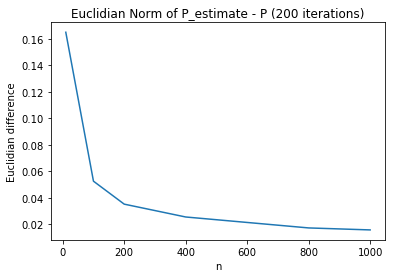

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [492]:
plot(n_, pnorm)
title('Euclidian Norm of P_estimate - P (200 iterations)')
xlabel('n')
ylabel('Euclidian difference')

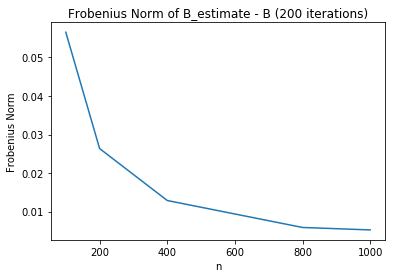

/Users/erenaldis/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [493]:
plot(n_, Bnorm)
title('Frobenius Norm of B_estimate - B (200 iterations)')
xlabel('n')
ylabel('Frobenius Norm')